In [10]:
import networkx as nx

# Create the graph object
G = nx.Graph()

# Add nodes
G.add_nodes_from(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ',
                  'Cleveland, OH', 'Indianapolis, IN', 'Denver, CO', 'Las Vegas, NV', 'Albuquerque, NM',
                  'Kansas City, MO', 'Oklahoma City, OK', 'Dallas, TX', 'Austin, TX',
                  'El Paso, TX', 'Tucson, AZ', 'Flagstaff, AZ', 'Santa Fe, NM', 'Colorado Springs, CO',
                  'Grand Canyon National Park, AZ'])

# Add edges with distances
G.add_edge('New York, NY', 'Cleveland, OH', weight=400)
G.add_edge('Cleveland, OH', 'Chicago, IL', weight=340)
G.add_edge('Chicago, IL', 'Kansas City, MO', weight=500)
G.add_edge('Kansas City, MO', 'Denver, CO', weight=600)
G.add_edge('Denver, CO', 'Grand Canyon National Park, AZ', weight=700)
G.add_edge('Grand Canyon National Park, AZ', 'Flagstaff, AZ', weight=145)
G.add_edge('Flagstaff, AZ', 'Phoenix, AZ', weight=150)
G.add_edge('New York, NY', 'Indianapolis, IN', weight=680)
G.add_edge('Indianapolis, IN', 'Kansas City, MO', weight=550)
G.add_edge('Kansas City, MO', 'Oklahoma City, OK', weight=350)
G.add_edge('Oklahoma City, OK', 'Albuquerque, NM', weight=500)
G.add_edge('Albuquerque, NM', 'Flagstaff, AZ', weight=400)
G.add_edge('Phoenix, AZ', 'Tucson, AZ', weight=120)
G.add_edge('Tucson, AZ', 'El Paso, TX', weight=320)
G.add_edge('El Paso, TX', 'Santa Fe, NM', weight=480)
G.add_edge('Santa Fe, NM', 'Colorado Springs, CO', weight=470)
G.add_edge('Colorado Springs, CO', 'Denver, CO', weight=100)
G.add_edge('Houston, TX', 'Austin, TX', weight=160)
G.add_edge('Austin, TX', 'Dallas, TX', weight=195)
G.add_edge('Dallas, TX', 'Oklahoma City, OK', weight=210)
G.add_edge('Oklahoma City, OK', 'Kansas City, MO', weight=350)
G.add_edge('Las Vegas, NV', 'Flagstaff, AZ', weight=300)
G.add_edge('Las Vegas, NV', 'Los Angeles, CA', weight=270)





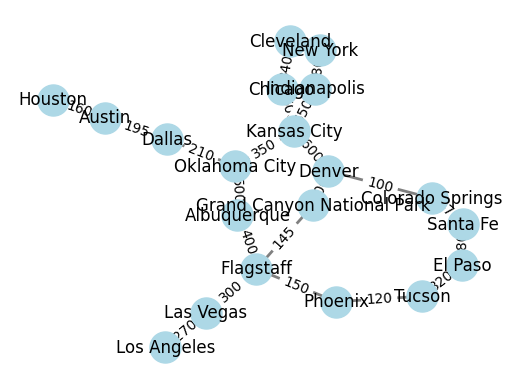

In [11]:
import matplotlib.pyplot as plt

# set positions for the nodes (optional)
pos = nx.spring_layout(G)

# draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# draw node labels
node_labels = {node: node.split(',')[0] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# show the plot
plt.axis('off')
plt.show()

In [33]:
import networkx as nx
import numpy as np

def q_learning_shortest_path(G, start_node, end_node, learning_rate=0.8, discount_factor=0.95, epsilon=0.2, num_episodes=1000):
    """
    Calculates the shortest path in a graph G using Q-learning algorithm.

    Parameters:
        G (networkx.Graph): the graph
        start_node: the starting node
        end_node: the destination node
        learning_rate (float): the learning rate (default=0.8)
        discount_factor (float): the discount factor (default=0.95)
        epsilon (float): the exploration factor (default=0.2)
        num_episodes (int): the number of episodes (default=1000)

    Returns:
        A list with the shortest path from start_node to end_node.
    """
    # Extract nodes and edges data
    nodes = list(G.nodes())
    num_nodes = len(nodes)
    edges = list(G.edges(data=True))
    num_edges = len(edges)
    edge_distances = np.zeros((num_nodes, num_nodes))
    for i, j, data in edges:
        edge_distances[nodes.index(i), nodes.index(j)] = data['weight']
        edge_distances[nodes.index(j), nodes.index(i)] = data['weight']
    
    # Initialize Q-values table
    q_table = np.zeros((num_nodes, num_nodes))
    
    # Convert start and end node to node indices
    start_node_index = nodes.index(start_node)
    end_node_index = nodes.index(end_node)
    
    # Q-learning algorithm
    for episode in range(num_episodes):
        current_node = start_node_index
        print(episode)
        while current_node != end_node_index:
            # Choose action based on epsilon-greedy policy
#             print("Stuck")
            if np.random.uniform(0, 1) < epsilon:
                # Explore
                possible_actions = np.where(edge_distances[current_node,:] > 0)[0]
                if len(possible_actions) == 0:
                    break
                action = np.random.choice(possible_actions)
            else:
                # Exploit
                possible_actions = np.where(q_table[current_node,:] == np.max(q_table[current_node,:]))[0]
                if len(possible_actions) == 0:
                    break
                action = np.random.choice(possible_actions)

            # Calculate reward and update Q-value
            next_node = action
            reward = -edge_distances[current_node, next_node]
#             print("Came till here")
            q_table[current_node, next_node] = (1 - learning_rate) * q_table[current_node, next_node] + learning_rate * (reward + discount_factor * np.max(q_table[next_node, :]))
#             print("But not here")
            # Move to next node
            current_node = next_node
            if current_node == end_node_index:
                break
    print(q_table)
    # Extract shortest path from Q-values table
#     print("Exited for loop")
    shortest_path = [start_node]
    current_node = start_node_index
    while current_node != end_node_index:
#         print("stuck 2")
        next_node = np.argmax(q_table[current_node, :])
        shortest_path.append(nodes[next_node])
        current_node = next_node
    shortest_path.append(end_node)
    return shortest_path


In [34]:
shortest_path = q_learning_shortest_path(G, 'New York, NY', 'Phoenix, AZ')
print(shortest_path)


0
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
1
Stuck
Came till here
But not here
2
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
3
Stuck
Came till here
But not here
Stuck


Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
93
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
94
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came til

Came till here
But not here
258
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
259
Stuck
Came till here
But not here
Stuck
Came till here
But not here
260
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Ca

Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here

Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
603
Stuck
Came till here
But not here
Stuck
Came till here
But not here
604
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came t

Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
789
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
790
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
791
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Ca

Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here
But not here
Stuck
Came till here

KeyboardInterrupt: 